In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


#loading the data set
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

#filling missing values in sleep disorder feature
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

df['Stress Level'] = df['Stress Level'].map(str)

In [2]:
# #dividing dependand and independant variayables 
y = df['Stress Level']
X = df.drop("Stress Level", axis=1)

# #dividing uper and lover blood presure in independant variyable
X[['Upper Blood Pressure', 'Lower Blood Pressure']] = X["Blood Pressure"].apply(lambda x: pd.Series(str(x).split("/")))
X = X.drop(columns=(['Blood Pressure', 'Person ID']), axis=1)

# #one hot encording in independant variyable
X = pd.get_dummies(X, columns=['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], dtype=int)

# #One HOT encording in dependant variyable
# y = pd.get_dummies(y, dtype=int)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

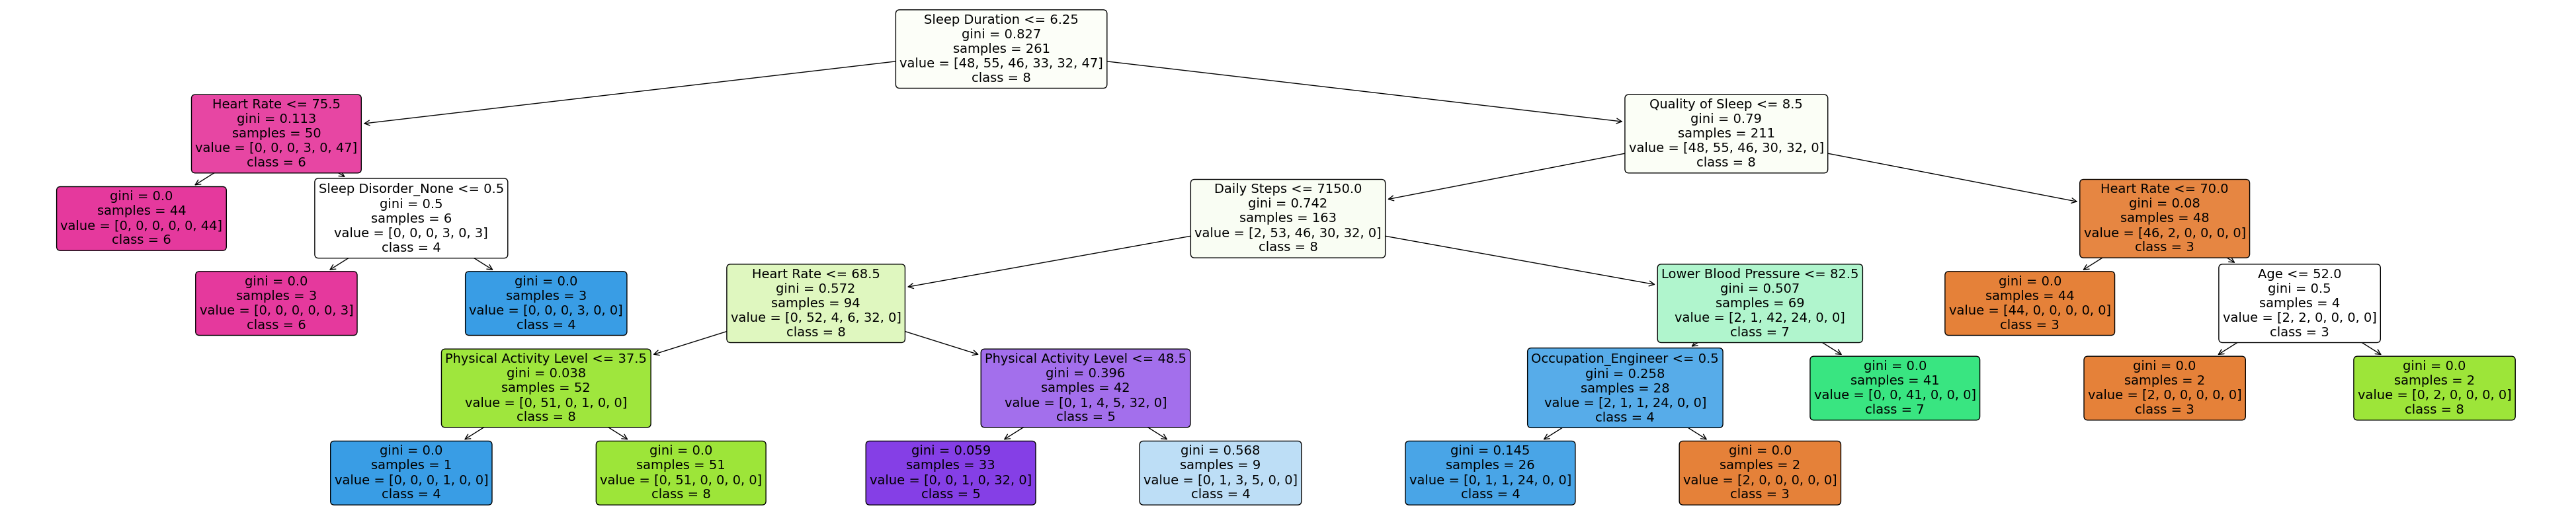

In [3]:
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
import matplotlib.pyplot as plt


dt = DecisionTreeClassifier(max_depth =5)
dt.fit(x_train, y_train)

feature_names = X.columns
feature_names = list(feature_names)
labels = y_test.unique()
labels = list(labels)

plt.figure(figsize=(50,10), facecolor ='white')
a = tree.plot_tree(dt,feature_names = feature_names, class_names = labels, rounded = True, filled = True, fontsize=14)
plt.show()

In [4]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = dt.predict(x_test)

print("Acuracy", accuracy_score(y_test, y_pred))
print("Precision_score", precision_score(y_test, y_pred, average='weighted'))
print("Recall_score", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score", f1_score(y_test, y_pred, average='weighted'))

Acuracy 0.9557522123893806
Precision_score 0.9603108989287379
Recall_score 0.9557522123893806
F1 Score 0.9554156935649492
